<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/Computer%20Vision/Object_Detection_with_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the YOLOv8 model to detect and label objects in an image using bounding boxes
and class labels

Install YOLOv8 via Ultralytics

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


Load YOLOv8 Pretrained Model

In [11]:
from ultralytics import YOLO
# Load the YOLO11 pretrained model (e.g., 'yolo11n.pt' for nano version)
model = YOLO("yolo11n.pt")

Run Object Detection on an Image


Found https://i.etsystatic.com/6911688/r/il/e2d20f/1132523011/il_794xN.1132523011_9xlg.jpg locally at il_794xN.1132523011_9xlg.jpg
image 1/1 /content/il_794xN.1132523011_9xlg.jpg: 512x640 1 dog, 1 zebra, 1 frisbee, 1 sports ball, 1 baseball bat, 1 teddy bear, 406.0ms
Speed: 17.0ms preprocess, 406.0ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 640)


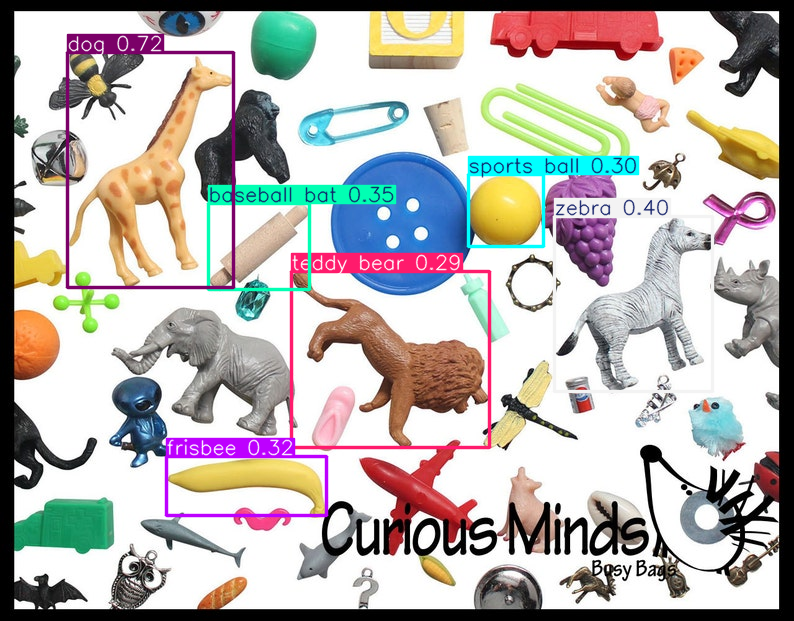

In [13]:
# Detect objects in an image
results = model("https://i.etsystatic.com/6911688/r/il/e2d20f/1132523011/il_794xN.1132523011_9xlg.jpg")
# Display results
results[0].show() # Opens image with bounding boxes in a window

Access Detection Results

In [15]:
# Print labels and bounding boxes
for result in results:
  boxes = result.boxes
  for box in boxes:
    class_id = int(box.cls)
    confidence = float(box.conf)
    xyxy = box.xyxy[0].tolist()
    print(f"Detected {model.names[class_id]} with confidence {confidence:.4f}")

Detected dog with confidence 0.7162
Detected zebra with confidence 0.3963
Detected baseball bat with confidence 0.3510
Detected frisbee with confidence 0.3228
Detected sports ball with confidence 0.2966
Detected teddy bear with confidence 0.2870


Save Annotated Image

In [21]:
# Save the image with bounding boxes
results[0].save("output.jpg")

'output.jpg'

Run on Webcam (Real-Time Detection)

In [ ]:
# Open webcam and detect
model.predict(source=0, show=True) # 0 = default webcam